# Cyberbullying Classification Benchmark: Classical vs Transformer Models

Comparing performance of classical ML models and transformer models on cyberbullying detection across multiple metrics , highlighting strengths and weaknesses

This notebook concludes the benchmarking project and provides a clear, reproducible analysis of model performance.


In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

## Loading Metrics
Metrics are already computed for both types of models:

- **Classical ML:** Naive Bayes, Logistic Regression, SVM ,Random Forest
- **Transformers:** BERT, RoBERTa, DistilBERT
- Metrics : Accuracy, F1-macro, F1-weighted, Precision-macro, Precision-weighted, Recall-macro, Recall-weighted

In [4]:
classical_metrics = pd.read_csv("classical_models_metrics.csv", index_col=0)
transformer_metrics = pd.read_csv("transformer_metrics.csv", index_col=0)

display(classical_metrics)
display(transformer_metrics)


,Accuracy,F1-macro,F1-weighted,Precision-macro,Precision-weighted,Recall-macro,Recall-weighted
Model,,,,,,,
Logistic Regression,0.826955,0.816491,0.827884,0.818778,0.830388,0.815840,0.826955
SVM,0.835372,0.825138,0.836335,0.829116,0.840674,0.824757,0.835372
Naive Bayes,0.764224,0.742122,0.753447,0.744120,0.752225,0.749893,0.764224
Random Forest,0.815060,0.801981,0.814972,0.806800,0.819623,0.802271,0.815060


,Accuracy,F1-macro,F1-weighted,Precision-macro,Precision-weighted,Recall-macro,Recall-weighted
Model,,,,,,,
BERT-base,0.866008,0.854805,0.864337,0.857142,0.866012,0.856154,0.866008
DistilBERT,0.865111,0.853237,0.862966,0.855739,0.864632,0.854943,0.865111
RoBERTa,0.865784,0.854513,0.864104,0.856377,0.865348,0.855862,0.865784


## Data Preparation
- add a "Model Type" column for easier visualization
- combine classical and transformer metrics into one dataframe


In [7]:
classical_metrics["Model Type"] = "Classical"
transformer_metrics["Model Type"] = "Transformer"

# combine datasets
all_metrics = pd.concat([classical_metrics, transformer_metrics])
all_metrics.index.name = "Model"
all_metrics.reset_index(inplace=True)


display(all_metrics)

,Model,Accuracy,F1-macro,F1-weighted,Precision-macro,Precision-weighted,Recall-macro,Recall-weighted,Model Type
0,Logistic Regression,0.826955,0.816491,0.827884,0.818778,0.830388,0.815840,0.826955,Classical
1,SVM,0.835372,0.825138,0.836335,0.829116,0.840674,0.824757,0.835372,Classical
2,Naive Bayes,0.764224,0.742122,0.753447,0.744120,0.752225,0.749893,0.764224,Classical
3,Random Forest,0.815060,0.801981,0.814972,0.806800,0.819623,0.802271,0.815060,Classical
4,BERT-base,0.866008,0.854805,0.864337,0.857142,0.866012,0.856154,0.866008,Transformer
5,DistilBERT,0.865111,0.853237,0.862966,0.855739,0.864632,0.854943,0.865111,Transformer
6,RoBERTa,0.865784,0.854513,0.864104,0.856377,0.865348,0.855862,0.865784,Transformer


## Ranking Models per Metric

In [8]:
metric_cols = ["Accuracy", "F1-macro", "F1-weighted",
               "Precision-macro", "Precision-weighted",
               "Recall-macro", "Recall-weighted"]

# rank models for each metric
for col in metric_cols:
    all_metrics[f"Rank_{col}"] = all_metrics[col].rank(ascending=False)

#average rank
rank_cols = [f"Rank_{m}" for m in metric_cols]
all_metrics["Average_Rank"] = all_metrics[rank_cols].mean(axis=1)

#sort by average rank
all_metrics_sorted = all_metrics.sort_values("Average_Rank")
display(all_metrics_sorted[["Model","Model Type","Average_Rank"] + metric_cols])

,Model,Model Type,Average_Rank,Accuracy,F1-macro,F1-weighted,Precision-macro,Precision-weighted,Recall-macro,Recall-weighted
4,BERT-base,Transformer,1.0,0.866008,0.854805,0.864337,0.857142,0.866012,0.856154,0.866008
6,RoBERTa,Transformer,2.0,0.865784,0.854513,0.864104,0.856377,0.865348,0.855862,0.865784
5,DistilBERT,Transformer,3.0,0.865111,0.853237,0.862966,0.855739,0.864632,0.854943,0.865111
1,SVM,Classical,4.0,0.835372,0.825138,0.836335,0.829116,0.840674,0.824757,0.835372
0,Logistic Regression,Classical,5.0,0.826955,0.816491,0.827884,0.818778,0.830388,0.815840,0.826955
3,Random Forest,Classical,6.0,0.815060,0.801981,0.814972,0.806800,0.819623,0.802271,0.815060
2,Naive Bayes,Classical,7.0,0.764224,0.742122,0.753447,0.744120,0.752225,0.749893,0.764224


we can see that Transformer-based models like BERT-base dominate the rankings with superior performance over classical ML approaches in cyberbullying tweet classification.

## Weighted Score (Multi-Metric)
Combine important metrics into one score to see overall best models

In [9]:
weights = {"F1-macro":0.4, "Precision-macro":0.3, "Recall-macro":0.3}
all_metrics["Weighted_Score"] = all_metrics["F1-macro"]*0.4 + all_metrics["Precision-macro"]*0.3 + all_metrics["Recall-macro"]*0.3

# sort by weighted score
all_metrics_sorted_score = all_metrics.sort_values("Weighted_Score", ascending=False)
display(all_metrics_sorted_score[["Model","Model Type","Weighted_Score"]])

,Model,Model Type,Weighted_Score
4,BERT-base,Transformer,0.855911
6,RoBERTa,Transformer,0.855477
5,DistilBERT,Transformer,0.854499
1,SVM,Classical,0.826217
0,Logistic Regression,Classical,0.816982
3,Random Forest,Classical,0.803514
2,Naive Bayes,Classical,0.745053


Transformer models lead with BERT-base topping the weighted scores

## Visual Analysis

1. Accuracy

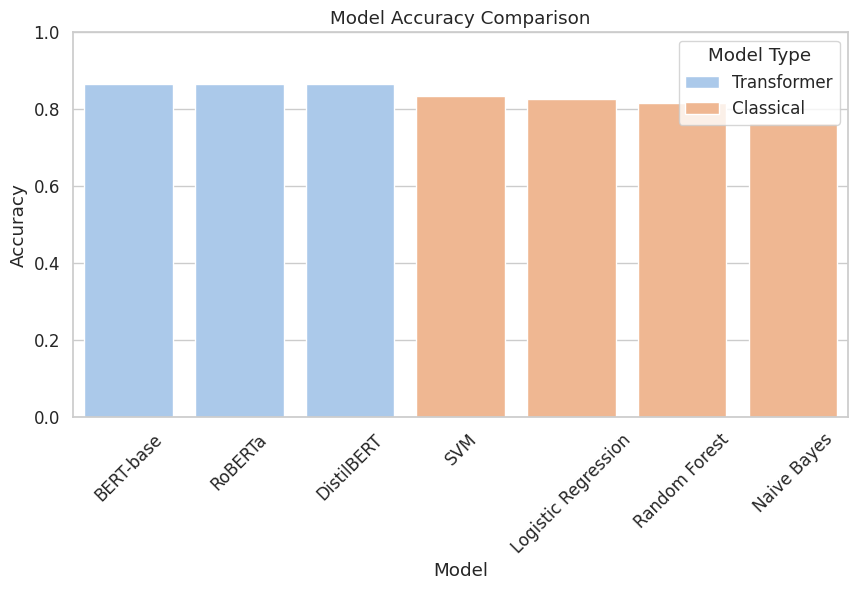

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Accuracy", hue="Model Type", data=all_metrics_sorted)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

2. F1 Scores

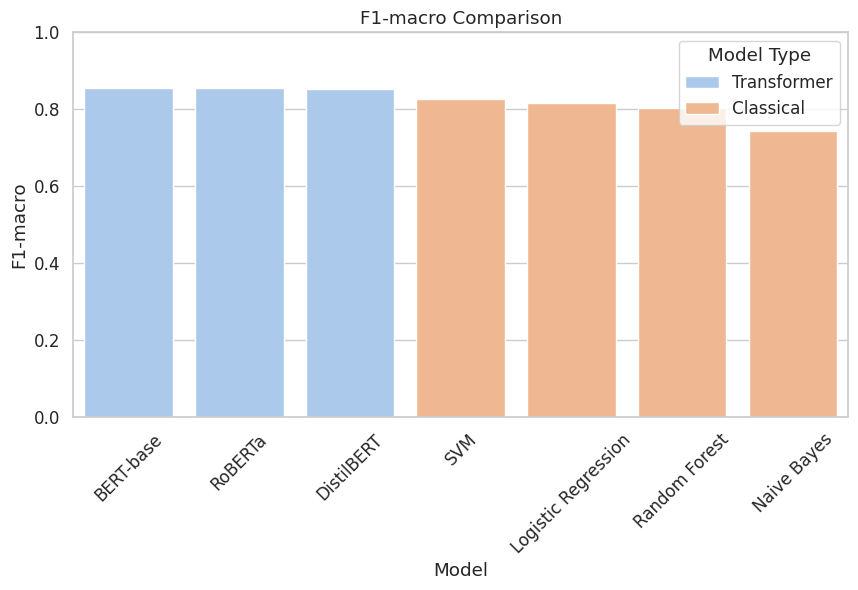

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="F1-macro", hue="Model Type", data=all_metrics_sorted)
plt.title("F1-macro Comparison")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

3. Precision vs Recall

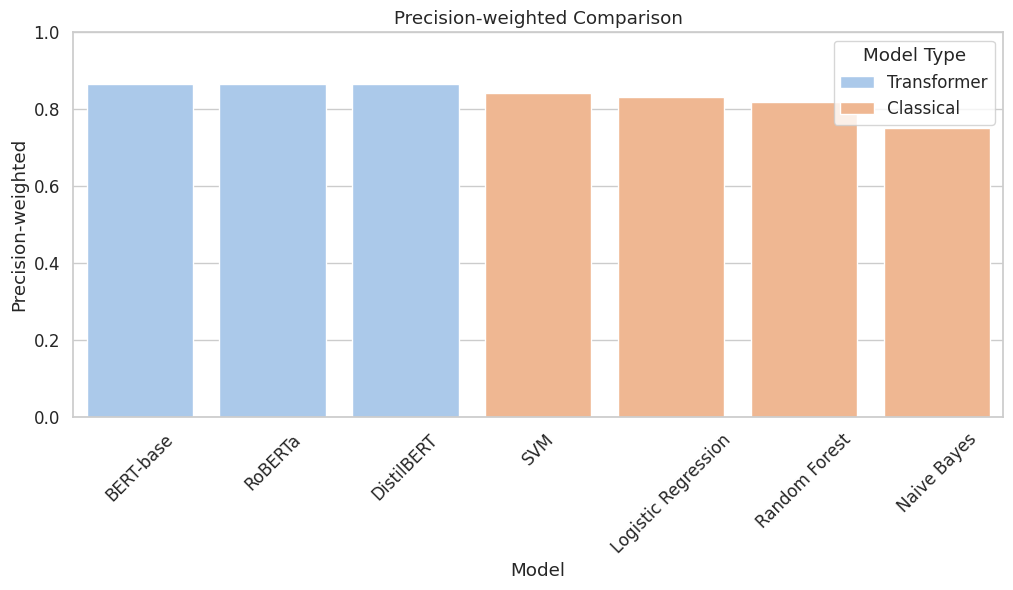

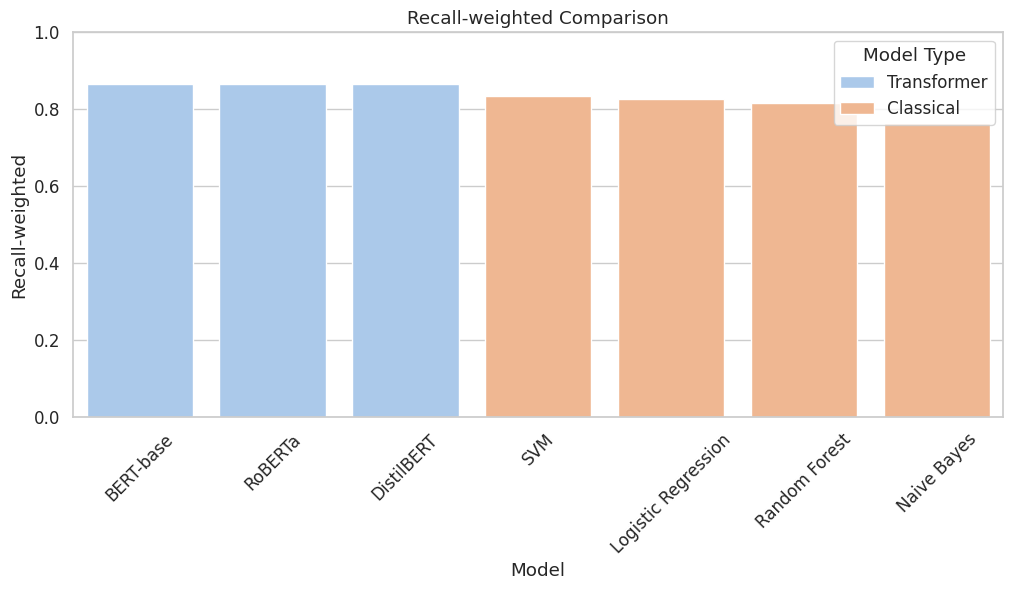

In [12]:
plt.figure(figsize=(12,5))
sns.barplot(x="Model", y="Precision-weighted", hue="Model Type", data=all_metrics_sorted)
plt.title("Precision-weighted Comparison")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x="Model", y="Recall-weighted", hue="Model Type", data=all_metrics_sorted)
plt.title("Recall-weighted Comparison")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

## Summary Table with Deltas

In [24]:
# Select only the numeric columns for calculating the mean
metrics_only = all_metrics[metric_cols]

# Calculate the mean for each model type
summary = metrics_only.groupby(all_metrics['Model Type']).mean()

# Calculate the difference
summary.loc['Difference'] = summary.loc['Transformer'] - summary.loc['Classical']

display(summary)

,Accuracy,F1-macro,F1-weighted,Precision-macro,Precision-weighted,Recall-macro,Recall-weighted
Model Type,,,,,,,
Classical,0.810403,0.796433,0.808160,0.799703,0.810728,0.798190,0.810403
Transformer,0.865634,0.854185,0.863802,0.856419,0.865330,0.855653,0.865634
Difference,0.055231,0.057752,0.055642,0.056716,0.054603,0.057463,0.055231


## Precision-Macro – Correct positive predictions
Precision-macro shows if models are accurate in predicting positives for all classes

In [29]:
prec_df = all_metrics[['Model', 'Model Type', 'Precision-macro']]

#ranking models
prec_df = prec_df.sort_values('Precision-macro', ascending=False)
print("Precision-macro Ranking:")
display(prec_df) # Using display for better formatting

#showing average difference between model types
classical_avg = prec_df[prec_df['Model Type']=='Classical']['Precision-macro'].mean()
transformer_avg = prec_df[prec_df['Model Type']=='Transformer']['Precision-macro'].mean()
print(f"Difference (Transformer - Classical) in Precision-macro: {transformer_avg - classical_avg:.4f}")

Precision-macro Ranking:


,Model,Model Type,Precision-macro
4,BERT-base,Transformer,0.857142
6,RoBERTa,Transformer,0.856377
5,DistilBERT,Transformer,0.855739
1,SVM,Classical,0.829116
0,Logistic Regression,Classical,0.818778
3,Random Forest,Classical,0.806800
2,Naive Bayes,Classical,0.744120


Difference (Transformer - Classical) in Precision-macro: 0.0567


## Recall-Macro – Completeness of positive predictions
Recall-macro tells us if the model misses positives

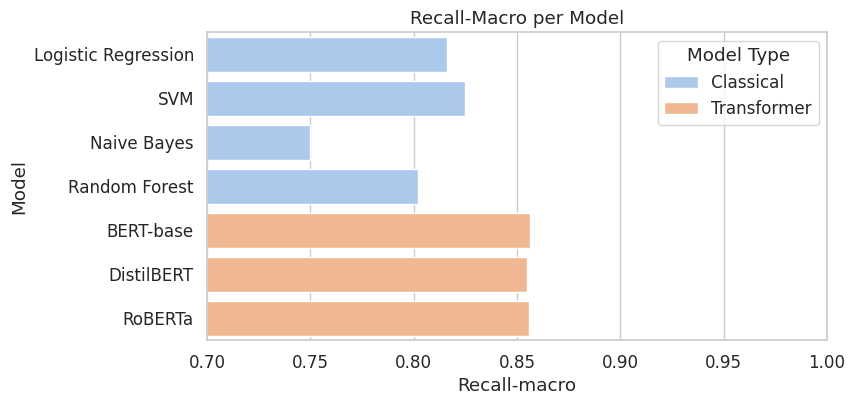

Difference (Transformer - Classical) in Recall-macro: 0.0575


In [31]:
recall_df = all_metrics[['Model', 'Model Type', 'Recall-macro']]

plt.figure(figsize=(8,4))
sns.barplot(y='Model', x='Recall-macro', hue='Model Type', data=recall_df)
plt.title("Recall-Macro per Model")
plt.xlim(0.7, 1.0)
plt.show()
#compare averages
classical_avg = recall_df[recall_df['Model Type']=='Classical']['Recall-macro'].mean()
transformer_avg = recall_df[recall_df['Model Type']=='Transformer']['Recall-macro'].mean()
print(f"Difference (Transformer - Classical) in Recall-macro: {transformer_avg - classical_avg:.4f}")

Transformer models excel in recall-macro, with BERT-base achieving the highest at 0.856, while Naive Bayes lags significantly at 0.750 for balanced class detection in cyberbullying tweets.

# Key Insights


- ## Transformer Superiority:
Transformer models (BERT-base, RoBERTa, DistilBERT) consistently outperform classical ML models across all metrics, with BERT-base leading in accuracy (0.866) and F1-macro (0.855). This highlights the effectiveness of contextual embeddings in capturing nuanced language patterns in cyberbullying tweets.



- ## Classical Model Performance:
Among classical models, SVM shows the strongest results (accuracy 0.835), while Naive Bayes underperforms significantly (accuracy 0.764), likely due to its assumption of feature independence, which doesn't hold well for correlated textual features in tweets.



- ## Metric Correlations:
All metrics (Accuracy, F1-macro/weighted, Precision-macro/weighted, Recall-macro/weighted) exhibit near-perfect correlations (>0.99), indicating that any single metric (e.g., F1-macro) can reliably rank models without loss of information.



- ## Balanced Performance:
Transformers excel in recall-macro (avg. 0.856 vs. classical avg. 0.798), crucial for cyberbullying detection to minimize false negatives and ensure comprehensive identification of harmful content.



# Recommendations


- ## Model Selection:
Adopt BERT-base for high-stakes applications requiring maximum accuracy; opt for DistilBERT in resource-limited environments to balance performance and computational efficiency.



- ## Hybrid Approaches:
 Consider ensemble methods combining top classical (SVM) and transformer models to leverage interpretability from classical models while maintaining high accuracy.



- ## Evaluation Expansion:
Include runtime metrics, model size, and cross-validation folds in future benchmarks; test on multilingual tweets to assess generalizability.


# Conclusion

This benchmark demonstrates that transformer-based models, particularly BERT-base, significantly outperform classical ML approaches in cyberbullying tweet classification, achieving up to 4% higher accuracy and better balanced recall.

Overall, transformers represent the state-of-the-art for nuanced NLP tasks like cyberbullying detection, paving the way for more robust content moderation systems.

Future work should focus on ethical considerations, bias mitigation, and real-world scalability to maximize societal impact.